In [22]:
!pip install openpyxl matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------------------- ------------------- 81.9/162.8 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.2/7.7 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.7 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.7 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.7 MB 2.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.7 MB 2.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.7 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.7 MB 2.6 MB/s eta 0:00:03
   ------ ----

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(1)
n = 100 
dates = pd.date_range(start= '2050-01-01', periods= n, freq='D') # creem 100 de zile
products = np.random.choice(['Tablet','Camera','Phone','HDD', 'Monitor'],n)
prices = np.round(np.random.uniform(50.0, 200.0, n),2) # generam 100 de pretsuri
quantities = np.random.randint(1,15, n) # generam 100 de cantitati

data = {
    'Date' : dates,
    'Product' : products,
    'Price' : prices,
    'Quantity' : quantities
}

df = pd.DataFrame(data)
df
# DataFrame 'df' este generat cu date random

,Date,Product,Price,Quantity
0,2050-01-01,HDD,147.16,7
1,2050-01-02,Monitor,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,HDD,162.92,1
...,...,...,...,...
95,2050-04-06,Phone,119.32,8
96,2050-04-07,Tablet,69.84,7
97,2050-04-08,Phone,164.64,3
98,2050-04-09,Monitor,81.91,11


In [3]:
df.dtypes # analizam tipul de date in 'df'

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [4]:
df.to_csv('random_sales.csv', index=False) # salvam in format CSV
# excludem coloana index care se creeaza automat 

In [5]:
# Citim din CSV fisier
df = pd.read_csv('random_sales.csv', parse_dates=['Date'])
df

,Date,Product,Price,Quantity
0,2050-01-01,HDD,147.16,7
1,2050-01-02,Monitor,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,HDD,162.92,1
...,...,...,...,...
95,2050-04-06,Phone,119.32,8
96,2050-04-07,Tablet,69.84,7
97,2050-04-08,Phone,164.64,3
98,2050-04-09,Monitor,81.91,11


In [6]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [11]:
df.to_excel('sales_data.xlsx') # Salvam in Excel fisier

In [13]:
df.to_json('sales_data.json') # Salvam in JSON fisier

In [14]:
df.shape

(100, 4)

In [16]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [17]:
df.values

array([[Timestamp('2050-01-01 00:00:00'), 'HDD', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Monitor', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'HDD', 162.92, 1],
       [Timestamp('2050-01-06 00:00:00'), 'Tablet', 182.2, 3],
       [Timestamp('2050-01-07 00:00:00'), 'Tablet', 51.75, 13],
       [Timestamp('2050-01-08 00:00:00'), 'Camera', 124.72, 10],
       [Timestamp('2050-01-09 00:00:00'), 'Monitor', 61.07, 7],
       [Timestamp('2050-01-10 00:00:00'), 'Monitor', 168.04, 1],
       [Timestamp('2050-01-11 00:00:00'), 'Camera', 59.61, 7],
       [Timestamp('2050-01-12 00:00:00'), 'Phone', 103.3, 8],
       [Timestamp('2050-01-13 00:00:00'), 'Monitor', 191.28, 1],
       [Timestamp('2050-01-14 00:00:00'), 'Phone', 106.97, 4],
       [Timestamp('2050-01-15 00:00:00'), 'Monitor', 164.44, 10],
       [Timestamp('2050-01-16 00:00:00'), 'H

In [24]:
product_sales = df.groupby('Product')['Quantity'].sum() # Primim o serie
product_sales

Product
Camera     186
HDD        106
Monitor    173
Phone      124
Tablet     190
Name: Quantity, dtype: int64

In [32]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices
# Primim valoare medie pe pretsuri

Product
Camera     121.54
HDD        129.43
Monitor    115.61
Phone      123.47
Tablet     100.17
Name: Price, dtype: float64

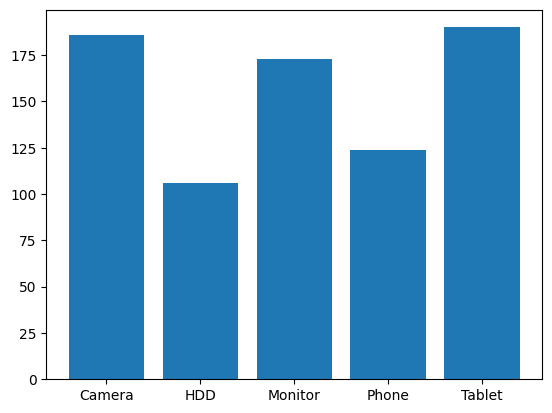

In [26]:
# Creem diagrama
plt.bar(product_sales.index, product_sales.values) 
plt.show()

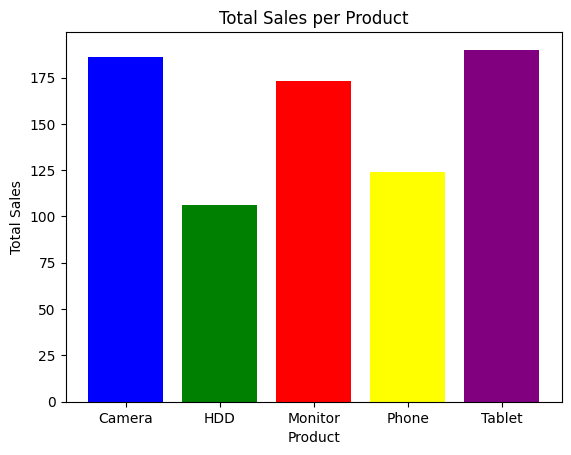

In [31]:
plt.bar(product_sales.index, product_sales.values, color=['blue','green','red','yellow','purple']) 
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

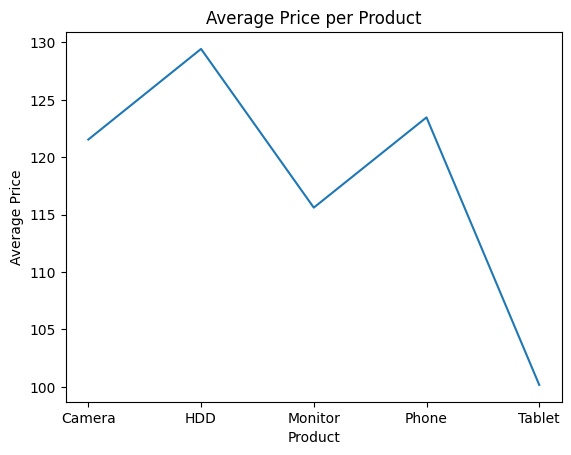

In [39]:
plt.plot(average_prices.index, average_prices.values) 
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()